### Условие задачи

**Дано:**
- двумерная решетка молекул, расположенных в узлах кристаллической решетки, размеров $L_x \times L_y$ с периодическими границами
- каждая молекула обладает спином +1 или -1
- межмолекулярное взаимодействие описывается константами $J_{ij} = 1$
- модель Изинга


**Требуется:**
- согласно модели Изинга рассчитать нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$ для указанной решетки молекул при:
    - размерах решетки $L_x \in [2, 3, ..., 8]$, $L_y = 4$
    - температурах $kT \in [1.0, 5.0)$ с шагом $0.1$
- сохранить массив средних энергий при помощи `np.save`
- вывести время расчета каждой итерации по $Lx$ или по $k T$
- отобразить цветовую карту:
    - ось абсцисс - $L_x$,
    - ось ординат - $k T$,
    - цветом отобразить нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$,
    - подписать оси,
    - отобразить цветовую шкалу (`colorbar`),
    - засечки должны соответствовать значениям $Lx, kT$.
- к каждой функции добавить `docstring` с описанием того, что функция делает, всех параметров и возвращаемого значения    

**Описание:**

**Одномерный случай**

Модель Изинга является моделью магнетика. Пусть этот магнетик состоит из молекул, расположенных в узлах регулярной решетки. Пусть всего таких узлов будет $N$ штук, с индексами $i=1,\ldots, N$.

Предположим, что каждая молекула может быть представлена в виде магнитной стрелки, которая всегда либо направлена вдоль некоторой заданной оси, либо в противоположном направлении. То есть каждая молекула $i$ имеет две конфигурации, которые можно описывать с помощью "спиновой" переменной $\sigma_i$. Эта переменная принимает значение $+1$ (параллельно оси, спин направлен вверх) и $-1$ (антипараллельно оси, спин направлен вниз).

Пусть $\sigma = \{\sigma_1, \sigma_2, \ldots, \sigma_N\}$ обозначает набор значений всех $N$ спинов. Имеется $2^N$ различных наборов $\sigma$, и каждый из них описывает некоторое состояние системы. 

Гамильтониан системы  состоит из двух частей: первая $E_0$ включает вклад межмолекулярных сил внутри магнетика, а вторая $E_1(\sigma)$ вклад от взаимодействий каждого спина с внешним магнитным полем (здесь считается нулевым). 
$$H(\sigma)=E_0(\sigma)+E_1(\sigma)$$

В любой физической системе мы предполагаем все взаимодействия инвариантными по отношению к обращению времени, что означает инвариантность $E$ при изменении знаков всех полей и намагниченностей. Энергия должна быть четной функцией от $\sigma$:
$$E_0(\sigma_1,\ldots, \sigma_N)=E_0(-\sigma_1,\ldots, -\sigma_N)$$

Энергия системы при нулевом внешнем магнитном поле равна сумме произведений **соседних** спинов на константы взаимодействия $J_{ij}$
$$E(\sigma) = -\sum_{i} J_{i,i+1}\sigma_{i}\sigma_{i+1} $$

Вероятность находиться в состоянии $\sigma$
$$P(\sigma)=\frac{e^{-\beta E(\sigma)}}{Z},$$
	где $Z = \sum_{\sigma} e^{-\beta E(\sigma)}-$ статистическая сумма, $\beta = \frac{1}{k T}-$ обратная температура, $k-$ константа Больцмана.
	
Средняя энергия системы 
$$\langle E \rangle = \frac{1}{Z}\sum_{\{\sigma \}} E(\sigma)e^{-\frac{E(\sigma)}{kT}}$$
рассчитывается по всевозможным состояниям системы, т.е. всевозможным наборам $\sigma$.

**Двумерный случай**

В случае двумерной решетки энергия системы при нулевом внешнем магнитном поле вычисляется следующим образом: 
$$E(\sigma) = -\sum_{i,j} J_{ij}(\sigma_{i,j}\sigma_{i+1,j} + \sigma_{i,j}\sigma_{i,j+1})$$


**Проверка корректности результатов**

Нормированное значение средней энергии при температурах $kT \in [1.0, 5.0)$:

- для $L_x=4$

```
 -1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889
```

- для $L_x=5$

```
 -1.99715893 -1.99396296 -1.98857263 -1.98018387 -1.96788363 -1.95063964
 -1.92729692 -1.89661121 -1.85735639 -1.80853133 -1.74965024 -1.68103752
 -1.60399878 -1.52075577 -1.43412763 -1.3470633  -1.26219309 -1.18153361
 -1.10638872 -1.03740747 -0.97472647 -0.918132   -0.86720255 -0.82141645
 -0.78022445 -0.74309384 -0.70953215 -0.67909749 -0.65140075 -0.62610332
 -0.60291264 -0.58157686 -0.56187952 -0.54363452 -0.52668165 -0.51088271
 -0.49611811 -0.48228409 -0.46929029 -0.45705774
```

**Материалы:**
- [Бэкстер Р., Вольский Е. П., Дайхин Л. И. Точно решаемые модели в статистической механике](https://yadi.sk/i/2oY4c0bL08pNiw)
- [Пример хорошего `docstring`](https://github.com/numpy/numpy/blob/v1.21.0/numpy/linalg/linalg.py#L313-L395)
- [Зиннуров Б.Д., Якименко В.Я. Магнитные свойства модели Изинга в низких размерностях (МКР)](https://miem.hse.ru/data/2018/05/24/1149431665/model_Izinga_-_Zinnurov_Yakimenko.pdf)


**Правила оценивания:**

- оценка за корректно выполненный расчет для количества молекул в цепочке $L_x$, баллов из 100:
```
    Lx    =   2,   3,   4,   5,    6,    7,     8
    g(Lx) = 1.0, 1.8, 3.3, 6.4, 12.6, 24.9,  50.0
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выведены значения средней энергии - 20
    - не построена карта - 20
    - отсутствует `docstring` - 20
    - менее значимые недоработки - 10


- итоговая оценка за задание = $\sum_{Lx=2}^{8}{g(Lx)} - \sum_{i}{p(i)}$


In [31]:
from numba import njit, prange, jit
import numpy as np
import time
import matplotlib.pyplot as plt

In [71]:
@njit
def energy_2d(sigma: np.ndarray) -> int:
    """
    Compute the energy of a 2D Ising model configuration.

    Parameters
    ----------
    sigma : np.ndarray
        2D array representing the Ising model configuration.

    Returns
    -------
    int
        The computed energy of the configuration.

    Notes
    -----
    This function is jitted using Numba for parallel execution.

    """
    Lx, Ly = sigma.shape
    E = 0
    for i in range(Lx):
        for j in range(Ly):
            E -= sigma[i, j] * (sigma[(i + 1) % Lx, j] + sigma[i, (j + 1) % Ly])
    return E
    

In [80]:
@njit
def int2array(x: int, Lx: int, Ly: int) -> np.ndarray:
    """
    Convert an integer into a 2D Ising model configuration.

    Parameters
    ----------
    x : int
        Integer representation of the Ising model configuration.
    Lx : int
        The number of rows in the configuration.
    Ly : int
        The number of columns in the configuration.

    Returns
    -------
    np.ndarray
        2D array representing the Ising model configuration.

    Notes
    -----
    This function is jitted using Numba for parallel execution.

    """
    res = np.empty((Lx, Ly), dtype=np.int8)
    for i in range(Lx):
        for j in range(Ly):
            res[i, j] = (x & 1) * 2 - 1
            x = x >> 1
    return res
    

In [87]:
@njit(parallel = True, fastmath = True)
def sigma(Lx, Ly, kT):
    """
    Calculate the mean energy per site for a 2D Ising model.

    Parameters
    ----------
    Lx : int
        Number of rows in the Ising model configuration.
    Ly : int
        Number of columns in the Ising model configuration.
    kT : float
        Temperature parameter.

    Returns
    -------
    float
        The mean energy per site for the given Ising model.

    Notes
    -----
    This function is jitted using Numba for parallel execution.

    """
    E_mean = 0
    Z = 0
    for sigma in prange( 2**(Lx * Ly - 1) ):
        E = energy_2d( int2array( sigma, Lx, Ly ))
        e = np.exp(-E / kT)
        E_mean += E * e
        Z += e
    E_mean /= Z
    return E_mean / ( Lx * Ly )
    

In [101]:
def mean_energy_2d_optimized(Lx_values: np.ndarray, Ly: int, kT_values: np.ndarray) -> np.ndarray:
    """
    Calculate the mean energy for a range of Ising model configurations.

    Parameters
    ----------
    Lx_values : np.ndarray
        Array of integers representing the number of rows in the Ising model.
    Ly : int
        Number of columns in the Ising model configuration.
    kT_values : np.ndarray
        Array of temperature parameters.

    Returns
    -------
    np.ndarray
        Mean energy values for each combination of Lx and kT.

    Notes
    -----
    This function uses the sigma function to compute the mean energy
    for each configuration. It prints the mean energy and the iteration time.

    """
    E_mean_values = np.empty((len(Lx_values), len(kT_values)))
    for i in range(len(Lx_values)):
        
        Lx = Lx_values[i]
        for j in prange(len(kT_values)):
            start = time.time()
            kT = kT_values[j]
            E_mean_values[i, j] = sigma(Lx, Ly, kT)
            end = time.time()
            print('Lx=',Lx, 'kT=', kT, 'E_mean=', E_mean_values[i, j])
                   
            print('It_time', end - start)
        
    return E_mean_values
    

In [102]:
"""
Conditions
"""
Ly = 4
Lx_values = np.array([2, 3, 4, 5, 6, 7, 8])
kT_values = np.arange(1.0, 5.1, 0.1)
start = time.time()
E_mean_values_optimized = mean_energy_2d_optimized(Lx_values, Ly, kT_values)
end = time.time()
print('Elapsed time', end - start)
np.save("mean_energies_optimized.npy", E_mean_values_optimized)


Lx= 2 kT= 1.0 E_mean= -1.9950947414062459
It_time 0.7095592021942139
Lx= 2 kT= 1.1 E_mean= -1.989678618880808
It_time 0.00018310546875
Lx= 2 kT= 1.2000000000000002 E_mean= -1.9807487753449706
It_time 8.20159912109375e-05
Lx= 2 kT= 1.3000000000000003 E_mean= -1.9673111716909781
It_time 0.000308990478515625
Lx= 2 kT= 1.4000000000000004 E_mean= -1.9485144458851356
It_time 3.695487976074219e-05
Lx= 2 kT= 1.5000000000000004 E_mean= -1.9237582779717883
It_time 7.867813110351562e-06
Lx= 2 kT= 1.6000000000000005 E_mean= -1.8927729123774129
It_time 7.3909759521484375e-06
Lx= 2 kT= 1.7000000000000006 E_mean= -1.8556563932181036
It_time 6.9141387939453125e-06
Lx= 2 kT= 1.8000000000000007 E_mean= -1.8128631604710093
It_time 6.198883056640625e-06
Lx= 2 kT= 1.9000000000000008 E_mean= -1.7651476160907025
It_time 6.9141387939453125e-06
Lx= 2 kT= 2.000000000000001 E_mean= -1.7134756254766461
It_time 7.152557373046875e-06
Lx= 2 kT= 2.100000000000001 E_mean= -1.6589222707900901
It_time 6.9141387939453125

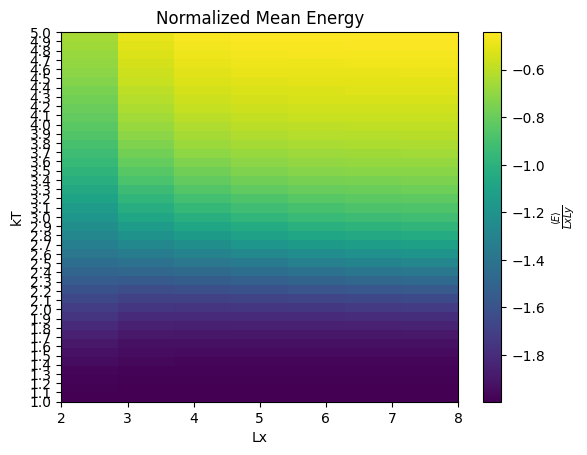

In [103]:
plt.imshow(np.load("mean_energies_optimized.npy").transpose(), origin='lower', extent=[min(Lx_values), max(Lx_values), min(kT_values), max(kT_values)], aspect='auto')
plt.xlabel('Lx')
plt.ylabel('kT')
plt.title('Normalized Mean Energy')
plt.colorbar(label=r'$\frac{\langle E \rangle}{Lx Ly}$')
plt.xticks(Lx_values)
plt.yticks(kT_values)
plt.show()